# Linear Regression Modelling & Evalutation

In this notebook, we will use the data set with 5 years of price quotes and index values of dates as a measure of time. We will train and test a linear regression model using the daily 'Open' prices. Then, we will evaluate the results using various error evaluation metrics.

***
## Create a Linear Regression Model
We will split the data set into training and testing sets. Using the training set, we will fit the data to a linear regression model and plot the trained model.Then, we will create and plot a predictive linear model utilizing the testing data.

### Import Libraries

In [1]:
# for calculations and plotting data
import pandas as pd  
import datetime as dt 
import matplotlib.pyplot as plt  
import matplotlib.dates as mdates
%matplotlib inline

# for linear regression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
# import data set
amzn_data = pd.read_csv("AMZN-5Yr-Quotes-Processed.csv", parse_dates=['Date'])

In [3]:
# confirm data types
amzn_data.dtypes

Date     datetime64[ns]
Close           float64
Open            float64
High            float64
Low             float64
dtype: object

### Extract Index Values

Instead of using dates for the independent variable like in the previous notebook, we will utilize indices associated with prices. We will need to add a column of indices to the dataframe. 

We will first reverse the dataframe and reset the index values such that 2015 is at index 0 and 2020 is at the end. Then, we will copy the index to a new column in the dataframe.

In [4]:
# reverse indices by reversing entire data set
amzn_data = amzn_data.iloc[::-1]

In [5]:
# reset indices, so that oldest date is first
amzn_data = amzn_data.reset_index(drop=True)
amzn_data.head()

,Date,Close,Open,High,Low
0,2015-06-18,439.39,430.30,439.73,429.405
1,2015-06-19,434.92,440.26,444.99,433.240
2,2015-06-22,436.29,437.00,439.24,434.180
3,2015-06-23,445.99,435.59,447.04,433.690
4,2015-06-24,440.84,444.97,446.47,440.230


In [6]:
# create a column with the new order of index values
amzn_data = amzn_data.reset_index()

In [7]:
amzn_data.head()

,index,Date,Close,Open,High,Low
0,0,2015-06-18,439.39,430.30,439.73,429.405
1,1,2015-06-19,434.92,440.26,444.99,433.240
2,2,2015-06-22,436.29,437.00,439.24,434.180
3,3,2015-06-23,445.99,435.59,447.04,433.690
4,4,2015-06-24,440.84,444.97,446.47,440.230


### Split Data Set
We will split the data into 80% for training and 20% for testing (70:30 ratio is also common).

#### X is the independent variable: 'index' (days since 2015)
This ranges from 0 to 1258. We will utilize the indices of the dataframe instead of the dates. The indices start from 0, which corresponds to 06-18-2015, and continue till 1258, which is 06-17-2020.

#### Y is the dependent variable: 'Open' (daily prices at open of each trading day)

In [8]:
# declare the independent and dependent variables
X = amzn_data[['index']]
Y = amzn_data[['Open']]

# split training and testing data for each variable with 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

### Train a Model

In [9]:
# create a linear regression model object
train_model = LinearRegression()

# fit training data to model
train_model = train_model.fit(X_train, y_train)

In [10]:
# extract intercept and slope of linear regression line
intercept = train_model.intercept_
slope = train_model.coef_

print("Intercept: ", intercept)
print("Coefficient/Slope: ", slope)

Intercept:  [352.97791669]
Coefficient/Slope:  [[1.4683056]]


Unlike the other the method in the 10-year data notebook, the intercept here is reasonable given that we are assuming the earliest date in the data set is where x = 0.

The slope is significantly higher for this portion of the data as we hypothesized in the 10-year data notebook.

### Plot trained model and regression line

Text(930, 1400, 'Actual Values\n(Testing Data)')

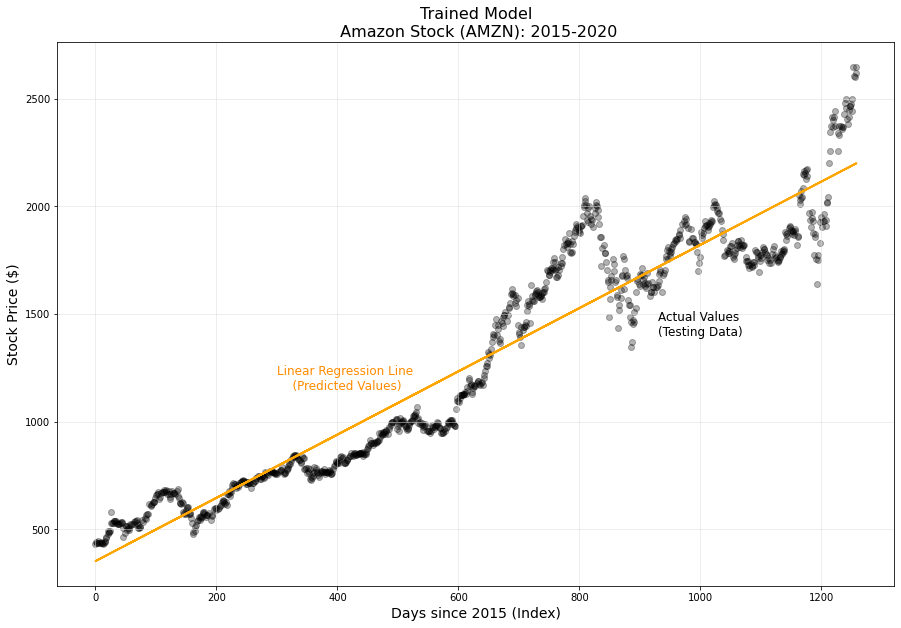

In [11]:
# format plot
fig = plt.figure(figsize=(15,10))
plt.grid(color="gainsboro", linewidth=0.5)
plt.title("Trained Model\n Amazon Stock (AMZN): 2015-2020", fontsize=16)
plt.xlabel("Days since 2015 (Index)", fontsize=14)
plt.ylabel("Stock Price ($)", fontsize=14)

# plot training data
plt.scatter(X_train, y_train,  color='black', alpha=0.3)
X_train_pred = train_model.predict(X_train) 
# use plot_date to display recognizable years (instead of number of days since 01-01-01)
plt.plot(X_train, X_train_pred, color='orange', linewidth=2)
plt.text(s="Linear Regression Line \n    (Predicted Values)", x=300, y=1150, color='darkorange', fontsize=12)
plt.text(s="Actual Values\n(Testing Data)", x=930, y=1400, color='black', fontsize=12)

### Predictive Model using test data

In [12]:
# test a single prediction
last_date = dt.datetime.strptime('2020-06-17', '%Y-%m-%d')
print(last_date)

2020-06-17 00:00:00


In [13]:
# get index value on that date
index = amzn_data['index'].loc[((amzn_data['Date']) == last_date)].values[0]
print(index)

1258


In [14]:
# output single prediction from date
predicted_value = train_model.predict([[index]])
print(predicted_value)

[[2200.10636595]]


The predicted value and the actual value are quite different, however, this difference matches what we can see in the plot with training data above.

## Create predictive model with test set

In [15]:
# compute predicted values and store in array
y_predicted = train_model.predict(X_test)

Text(900, 1400, 'Actual Values\n(Testing Data)')

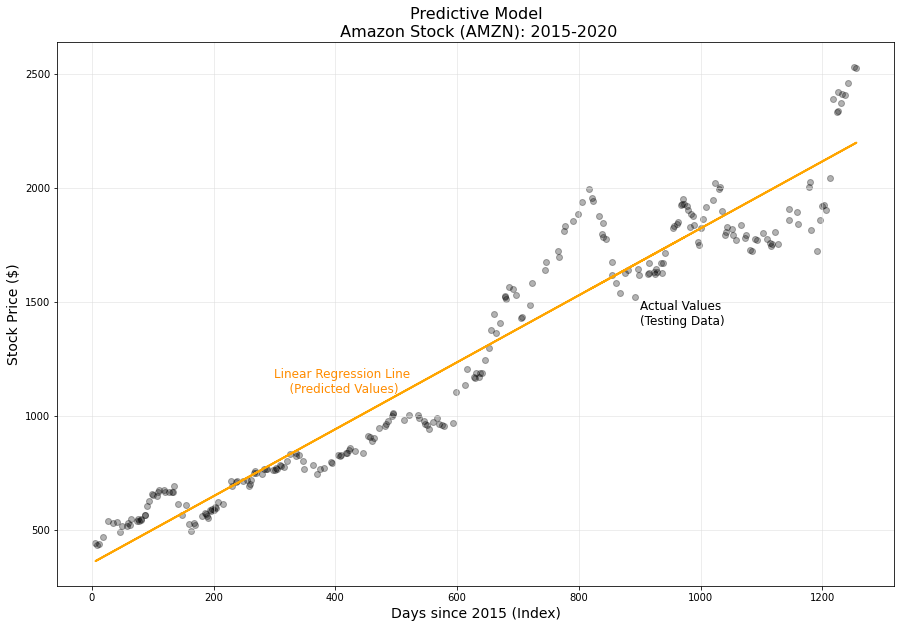

In [16]:
# format plot
fig = plt.figure(figsize=(15,10))
plt.grid(color="gainsboro", linewidth=0.5)
plt.title("Predictive Model\n Amazon Stock (AMZN): 2015-2020", fontsize=16)
plt.xlabel("Days since 2015 (Index)", fontsize=14)
plt.ylabel("Stock Price ($)", fontsize=14)

# plot predicted values with test data
plt.scatter(X_test, y_test, color='black', alpha=0.3)
# plot linear regression line for predicted values
plt.plot(X_test, y_predicted, color='orange', linewidth=2)

plt.text(s="Linear Regression Line \n    (Predicted Values)", x=300, y=1100, color='darkorange', fontsize=12)
plt.text(s="Actual Values\n(Testing Data)", x=900, y=1400, color='black', fontsize=12)

# Evaluate Model
We will utilize the following methods to evaluate our regression model:
- Residuals Distribution
- Confidence interval
- Null hypothesis and p-value
- MAE, MSE and RMSE

### Import libraries

In [17]:
# import norm package to plot normal distribution
from scipy.stats import norm
import seaborn as sns

# import for confidence interval and p-value
import statsmodels.api as sm

# import for error & accuracy evaluation metrics
from sklearn import metrics
import numpy as np

### Actual vs. Predicted Prices

Text(0.5, 1.0, 'Actual vs Predicted Prices')

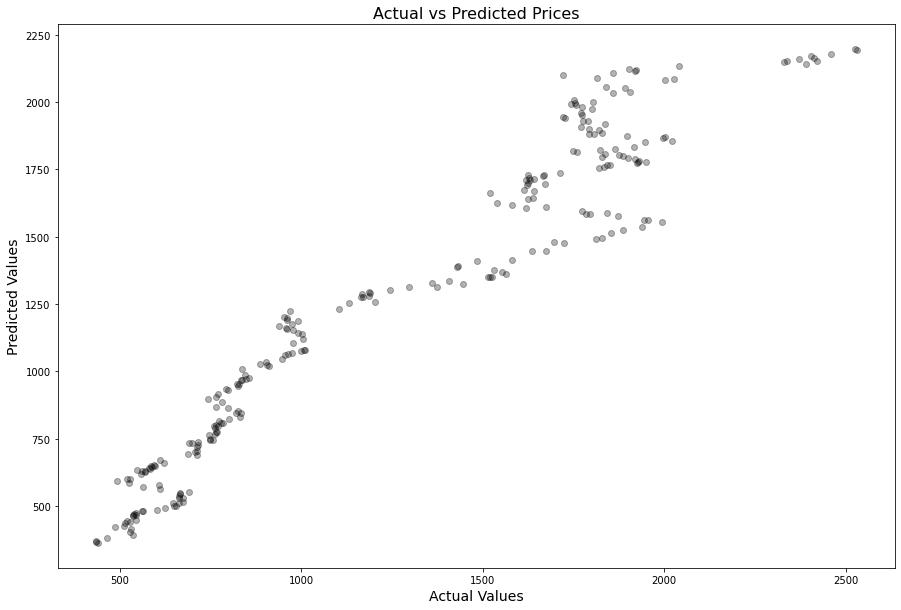

In [18]:
# actual values and predicted values
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_predicted, color='black', alpha=0.3)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Actual vs Predicted Prices", fontsize=16)

From this plot, we can see that the predicted values are similar to the actual values since there is a diagonal linear pattern. The predicted values after $1500 are a bit mixed. Some are too high, some are too low compared to the actual values, but the first half of the plot is fairly accurate. This also aligns with the visualization of the model and regression line above.

### Residuals Distribution
Plot residuals, predicted values' deviation from actual values. They should be close to a normal distribution. 

In [19]:
# format seaborn plots
sns.set(color_codes=True)

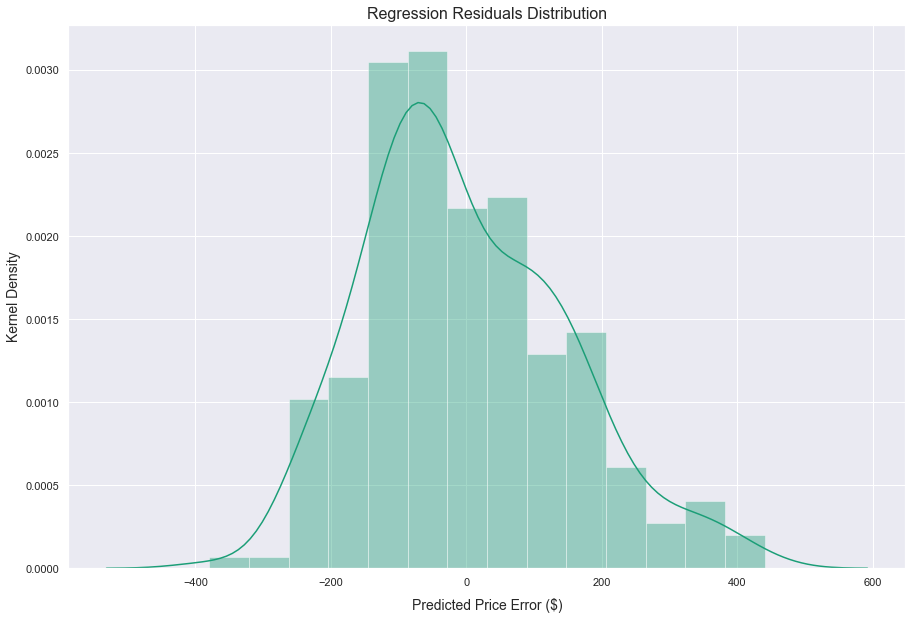

In [20]:
sns.set_palette('Dark2')
plt.figure(figsize=(15,10))
plt.xlabel("Predicted Price Error ($)", labelpad=10, fontsize=14)
plt.ylabel("Kernel Density", fontsize=14)
plt.title("Regression Residuals Distribution", fontsize=16)

# plot histogram (actual - predicted = residual)
sns.distplot((y_test - y_predicted))

Here, we can see a much better distribution of residuals compared with the 10-year data. Although it is slightly leaning to the right, this plot shows a normal distribution.

### Confidence Interval
The confidence interval will provide us with a range for the value of the slope (or coefficient) of the regression line such that we can have 95% confidence that this range (or interval) includes the correct coefficient value.

In [21]:
# create a least squares regression model 
a = sm.add_constant(X) # must add constant for statsmodels
b = Y

# fit data to model
model = sm.OLS(b, a).fit()

# display regression statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Open   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.404e+04
Date:                Wed, 01 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:30:11   Log-Likelihood:                -8171.3
No. Observations:                1259   AIC:                         1.635e+04
Df Residuals:                    1257   BIC:                         1.636e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        354.3385      8.986     39.433      0.000     336.709     371.968
index          1.4655      0.012    118.478      0.000       1.441       1.490
==============================================================================
Omnibus:                       72.638   Durbin-Watson:                   0.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.440
Skew:                           0.633   Prob(JB):                     4.61e-19
Kurtosis:                       3.079   Cond. No.                     1.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# with 95% confidence (certainty), 
# we can say the coefficient is between the resulting values
model.conf_int()

,0,1
const,336.709454,371.967549
index,1.441261,1.489796


We can say that the coefficient of the regression model is between 1.44 and 1.49 with 95% confidence. Our trained model above showed a coefficient of 1.468, which is within this range.

### Null Hypothesis & P-Value

The p-value is a useful measure to be able to reject the null hypothesis. Initially, we will assume the null hypothesis is true, meaning that there is absolutely no relationship between the independent variable (date) and dependent variable (stock price). 

If there is no relationship, the coefficient (slope) must be 0. So, we are assuming that the coefficient of the regression line is 0. The p-value indicates the probability of the coefficient being 0.

In [23]:
# display p-value
model.pvalues

const    5.164970e-222
index     0.000000e+00
dtype: float64

Since the p-value is 0 (or very close to 0), we can reject the null hypothesis. A p-value of zero shows that there is zero probability of a lack of relationship between the variables. Therefore, we confirm that a relationship between time and stock price must exist.

### Error Evaluation Metrics
- MAE (Mean Absolute Error): average error 
- MSE (Mean Squared Error): average of squared errors
- RMSE (Root Mean Squared Error): square root of MSE

In [24]:
# Calculate and print values of MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))  
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

MAE: 120.65526400072457
MSE: 22011.440498288644
RMSE: 148.36253064129315


The RMSE is often considered the best of these three primary metrics. As you can see, the MAE is smaller than the RMSE. This is because of the squaring of errors in MSE, which we take a square root of to get RMSE. This leads to a much larger emphasis on larger errors. 

Thus, the RMSE is larger than MAE. This shows that there was an average error of $148 between the actual and predicted values. This is over \\$100 better than the 10-year data.

In [25]:
# compute average opening prices
amzn_data['Open'].mean()

1276.1561257347103

With an average price of $1276, an error of \\$148 is an error of about 11.6%. This error is only 1/3 of the error we saw in the 10-yr data!

### $R^2$ (R-Squared)
This is another statistical measure to evaluate the accuracy of the regression model. It results in a value between 0 and 1, where a higher value means that the model fits your data well. The R-squared value is the percentage of the variance in the dependent variable that can be explained by the model.

In [26]:
print('R-Squared:', metrics.r2_score(y_test, y_predicted))

R-Squared: 0.9316846325570471


The r-squared value indicates that approximately 93.2% of the variation in the predicted stock prices can be explained by our model. This is 10% higher than the 10-year data regression model.

In simple terms, this means that 93.2% of the test data fit the regression model. The predicted values are very highly correlated with the actual values.

***
# Conclusion

Overall, this linear regression model fit with day and stock price data shows considerably more evidence of accurately predicting future prices. The various measures computed to determine the accuracy and evaluate errors improved considerably in this model compared with the 10-year model. 

With less data, we were able to create a more accurate model for short-term predictions, although there are many other external and non-technical factors that can affect the stock price. 

*** 
* * *
***

## For Fun 
#### _Predict the stock price in 1, 5 and 10 years, assuming it continues to grow at its current rate._

In [27]:
# datetime objects for future dates 
last_date = dt.datetime.strptime('2020-06-17', '%Y-%m-%d')
one_year = dt.datetime.strptime('2021-06-17', '%Y-%m-%d')
five_years = dt.datetime.strptime('2025-06-17', '%Y-%m-%d')
ten_years = dt.datetime.strptime('2030-06-17', '%Y-%m-%d')

In [28]:
# compute indices for future dates
index_one = (one_year - last_date).days + 1258
index_five = (five_years - last_date).days + 1258
index_ten = (ten_years - last_date).days + 1258

print("Index 1 Yr:", index_one)
print("Index 5 Yrs:",index_five)
print("Index 10 Yrs:",index_ten)

Index 1 Yr: 1623
Index 5 Yrs: 3084
Index 10 Yrs: 4910


In [29]:
# output single prediction from date
predict_one = train_model.predict([[index_one]])
predict_five = train_model.predict([[index_five]])
predict_ten = train_model.predict([[index_ten]])

print("Price in 1 Year: ", "$" + str('{0:.2f}'.format(predict_one[0][0])))
print("Price in 5 Years: ", "$" + str('{0:.2f}'.format(predict_five[0][0])))
print("Price in 10 Years: ", "$" + str('{0:.2f}'.format(predict_ten[0][0])))

Price in 1 Year:  $2736.04
Price in 5 Years:  $4881.23
Price in 10 Years:  $7562.36


In [30]:
# create dataframe of test points (index values) after 2020
future_test_x = np.random.randint(1258, index_ten, 500)
future_test_x = pd.DataFrame(future_test_x)

### Plot Prediction Model

In [31]:
# predicted future prices and store in np array
y_predicted_future = train_model.predict(future_test_x)

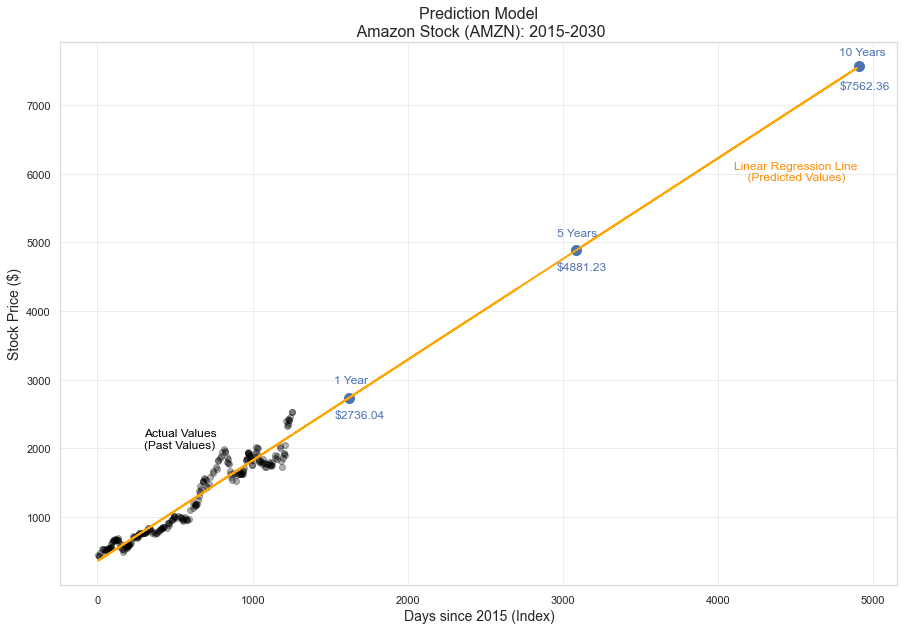

In [32]:
# format plot
fig = plt.figure(figsize=(15,10), edgecolor="black")
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'gainsboro'
plt.grid(color="gainsboro", linewidth=0.5)
plt.title("Prediction Model\n Amazon Stock (AMZN): 2015-2030", fontsize=16)
plt.xlabel("Days since 2015 (Index)", fontsize=14)
plt.ylabel("Stock Price ($)", fontsize=14)

# plot predicted values with actual previous data
plt.scatter(X_test, y_test, color='black', alpha=0.3)

# plotting one, five and ten year predictions
plt.scatter([index_one], [predict_one], color='b', s=100)
plt.scatter([index_five], [predict_five], color='b', s=100)
plt.scatter([index_ten], [predict_ten], color='b', s=100)

# labels for points
plt.annotate("1 Year\n\n\n" + "$" + str('{0:.2f}'.format(predict_one[0][0])), 
             (index_one, predict_one[0][0]), 
             textcoords='offset points', xytext=(-15,-20), ha='left', c='b')
plt.annotate("5 Years\n\n\n" "$" + str('{0:.2f}'.format(predict_five[0][0])), 
             (index_five, predict_five[0][0]), 
             textcoords='offset points', xytext=(-19,-20), ha='left', c='b')
plt.annotate("10 Years\n\n\n" "$" + str('{0:.2f}'.format(predict_ten[0][0])),
             (index_ten, predict_ten[0][0]), 
             textcoords='offset points', xytext=(-20,-23), ha='left', c='b')
plt.text(s="Linear Regression Line \n    (Predicted Values)", x=4100, y=5900, color='darkorange', fontsize=12)
plt.text(s="Actual Values\n(Past Values)", x=300, y=2000, color='black', fontsize=12)

# plot linear regression line for predicted values
plt.plot(future_test_x, y_predicted_future, color='orange', linewidth=2) # future prediction
plt.plot(X_test, y_predicted, color='orange', linewidth=2) # previous prediction